# <center>Predictive modelling with timeseries<center>
# <center>Baselines, stationarity and decomposition <center>

![Image](images/timeseries.jpg)

In [1]:
import pandas as pd
import numpy as np
from utils import adf_test
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from matplotlib import pyplot as plt

# jupyter lab configs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plotly.offline.init_notebook_mode(connected=True)

/Users/aline.ferreira-de-qu/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Baselines 

The simplest forecasts one can do using univariate datasets are:
1. Average
2. Naive
3. Seasonal Naive
3. Moving Average
    a. normal
    b. cumulative
    c. exponential
    
![Image](images/baselines.png) *Source: Hyndman and Athanasopoulos. www.otexts.com/fpp2/*


### Load the datasets

In [2]:
# example of trend data - wine sales
wine = pd.read_csv('datasets/wine_trend.csv')

# example of seasonal data - daily temperature
temperature = pd.read_csv('datasets/temperature_seasonal.csv')
temperature.set_index('date', drop=True, inplace=True)

# load a nice example for decomposition - production of electrical equipments
ele_df = pd.read_csv('datasets/elecequip.csv')

## Plot the data

# 1. Naive methods and averages

Which baseline worked best in the case of trend data? Which one was best for seasonal data?

# 2. Moving Average smoothing
## Understand the difference between `rolling` windows and `expanding` windows

Let's calculate a **moving average** and a **cumulative moving average** using the methods from pandas

In [12]:
ele_df['ma_5'] = ele_df.loc[:,'value'].rolling(window=2).mean()
ele_df['ma_10'] = ele_df.loc[:,'value'].rolling(window=50).mean()
ele_df['ma_exp'] = ele_df.loc[:,'value'].expanding().mean()

<Figure size 1152x576 with 0 Axes>

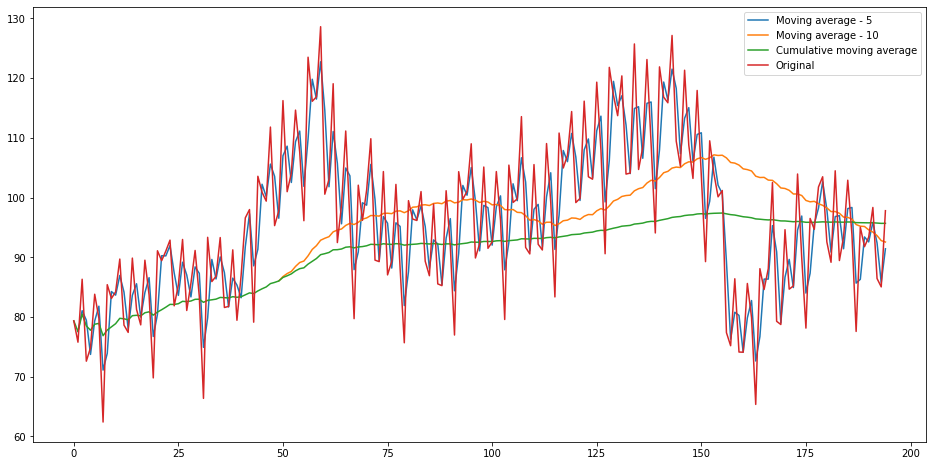

In [13]:
plt.figure(figsize=(16,8))
plt.plot(ele_df['ma_5'], label='Moving average - 5')
plt.plot(ele_df['ma_10'], label='Moving average - 10')
plt.plot(ele_df['ma_exp'], label='Cumulative moving average')
plt.plot(ele_df['value'], label='Original')
plt.legend(loc='best')
plt.show()

---

# Decomposition

### What is the data made of?  🤔

Time series can be better analysed if we know how each of its components behave.  
Typically, a time series  has 3 components:  
* `S` as the seasonal component  
* `T` as the trend component
* `R` as a residual component

If we consider that these components *add to each other*, the decomposition is said *additive*. 
Thus, in **additive decomposition** we have:  
> y(t) = S(t) + T(t) + R(t)  

And in **multiplicative decomposition** we have: 
> y(t) = S(t) x T(t) x R(t)  

**Example:** Decomposition of the Equipments dataset 

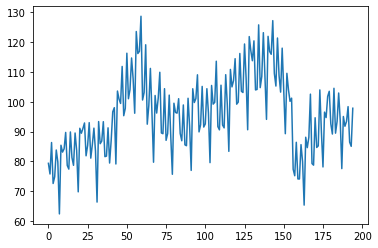

In [5]:
ele_df['value'].plot()

**Run the additive decomposition**  

The function `seasonal_decompose()` from `statsmodels` is very helpful:  

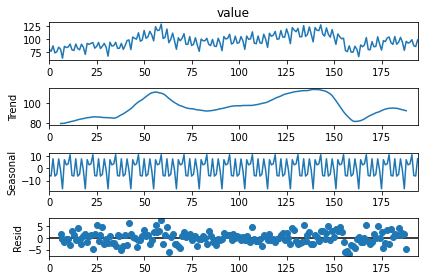

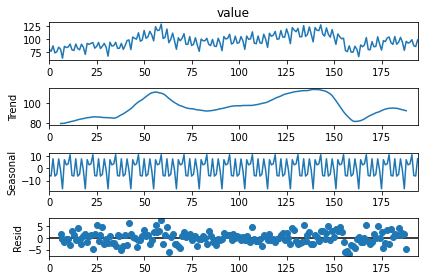

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ele_df['value'], model='additive', period=12) 
result.plot()

# Stationarity

### Is the data stationary?  🤔

Stationarity means your time series does not have any `trend` or `seasonality`. Stationary time series will have no predictable patterns in the long-term. They will be very important in ARIMA, for example.
A commom method to investigate this is with the  **Augmented Dickey-Fuller Test**.

**Example:** Check if the wine data is stationary. If it is not, 
try with differencing and see what happens.

In [7]:
# check if data is stationary
adf_test(wine.wine_sales)

Augmented Dickey-Fuller Test: 
Test the null hypothesis that the data is non-stationary
ADF test statistic       3.060142
p-value                  1.000000
lags                    10.000000
# observations          25.000000
critical value (1%)     -3.723863
critical value (5%)     -2.986489
critical value (10%)    -2.632800
Fail to reject the null hypothesis, data is  non-stationary


1.0

### Differencing (will be super important in ARIMA)

The results show the data is non-stationary.  
Some methods will require that the data is stationary. We can still try to adjust it by using **differencing**.
>**Differencing** is the difference between consecutive observations. It reduces (or eliminates) trend and seasonality.

This procedure can be done quickly with the method `diff()` from library `statsmodels.tsa`.

Augmented Dickey-Fuller Test: 
Test the null hypothesis that the data is non-stationary
ADF test statistic     -7.249074e+00
p-value                 1.799857e-10
lags                    1.000000e+00
# observations          3.300000e+01
critical value (1%)    -3.646135e+00
critical value (5%)    -2.954127e+00
critical value (10%)   -2.615968e+00
Reject the null hypothesis, data is stationary


1.7998574141687034e-10

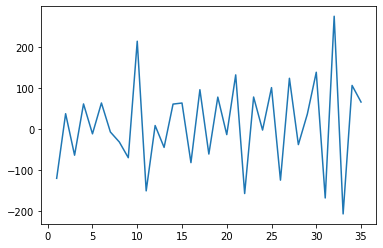

In [8]:
from statsmodels.tsa.statespace.tools import diff

wine['sales_diff'] = diff(wine['wine_sales'], k_diff=1)
wine['sales_diff'].plot()
adf_test(wine['sales_diff'])

## Autocorrelation plots (ACF) 

They also help understanding if the data is stationary.  
>For a stationary time series, the ACF will drop to zero relatively quickly, while the ACF of non-stationary data decreases slowly.  
(Hyndman and Athanasopoulos 2018)


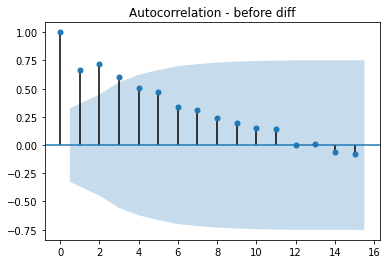

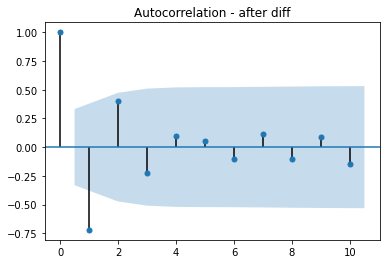

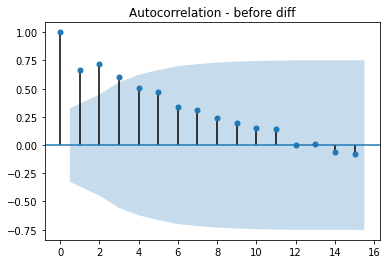

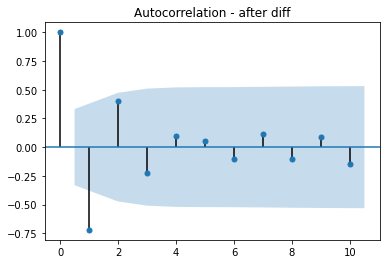

In [14]:
title = 'Autocorrelation - before diff'
lags = 15
plot_acf(wine['wine_sales'],title=title,lags=lags);
title = 'Autocorrelation - after diff'
lags = 10
plot_acf(wine.loc[1:, 'sales_diff'],title=title,lags=lags)

<a href='https://www.freepik.com/vectors/business'>Business vector created by freepik - www.freepik.com</a>